## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [32]:
#Normalizing the font sizes for the plots throughout the notebook
small = 14
meduim = 16
large = 18
plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=meduim)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
color = 'white' 
#Change the color of text in the plot according to your prefrence, 
#I had a dark theme on my notebook, so I set it to 'white'

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [33]:
X = np.linspace(0, 20)
a = -2
b = 1
Y = a*X+b
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [34]:
print(f'X = \n{X.T}, \nY = \n{Y.T}')

X = 
[[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
   2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
   4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
   7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
   9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
  12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
  14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
  17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
  19.59183673 20.        ]], 
Y = 
[[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
   -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
   -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
  -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
  -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
  -19.40816327 -20.2244898  -21.04

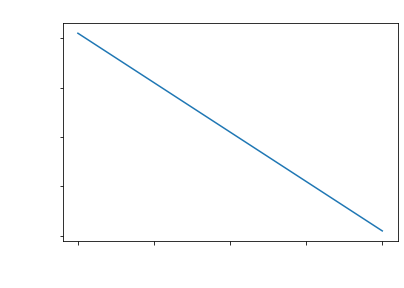

In [35]:
plt.plot(X, Y)
plt.title('X-Y Plot', color=color)
plt.xlabel('X', color=color)
plt.ylabel('Y', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [36]:
def GD(X, Y, alpha, iters):
    no_thetas = X.shape[-1] + 1
    m = X.shape[0]
    thetas = np.zeros(no_thetas).reshape(no_thetas, 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis = 1)

    print(f'x = {X.shape}, y = {Y.shape}, thetas = {thetas.shape}, m = {m}')
    h = np.dot(X, thetas)
    z = h - Y
    j = ((1/(2*m))*(z**2)).sum()
    j_prime = (1/m)*(np.dot(X.T, z))
    thetas = thetas - alpha*j_prime
    
    counter = 0
    list_h = []
    list_j= []
    list_thetas= []

    while(counter < iters):
        #Step 2 
        h = np.dot(X, thetas)    
        list_h.append(h)
        #Step 3
        z = h - Y
        j = ((1/(2*m))*(z**2)).sum()
        list_j.append(j)
        #Step 4
        j_prime = (1/m)*(np.dot(X.T, z))
        #Step 5/
        thetas = thetas - alpha*j_prime

        list_thetas.append(thetas)

        counter += 1

    print(f"theta_0 = {thetas[0]} \ntheta_1 = {thetas[1]}\nCost Function = {j}\nNo. of iterations = {counter}")
    return list_thetas, list_j, list_h, thetas    

In [37]:
def SVGD(X, Y, alpha, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    
    counter = 0
    list_j=[]
    list_theta_0=[]
    list_theta_1=[]
    list_thetas=[]
    
    h_theta = theta_0 + (theta_1*x_points)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    theta_0 = theta_0 - (alpha*(j_prime_theta_0))
    theta_1 = theta_1 - (alpha*(j_prime_theta_1))
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
    
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        #Step 3
        j_old = j
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        theta_0 = theta_0 - (alpha*(j_prime_theta_0))
        theta_1 = theta_1 - (alpha*(j_prime_theta_1))

        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
        

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nNumber of iterations = {counter}")
    return list_thetas, list_j, thetas

#### Try your function with any input parameterss of your choice.

In [38]:
alpha = 1e-3
iters = 500
l_thetas, l_j, l_h, thet = GD(X, Y, alpha, iters)
y_predicted = thet[0] + (thet[1]*X)
l_thetas = np.array(l_thetas)

x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50
theta_0 = [-0.00483062] 
theta_1 = [-1.92525679]
Cost Function = 0.13010314246298696
No. of iterations = 500


In [39]:
SVGD_thetas, SVGD_j, SVGD_thets = SVGD(X, Y, 1e-3, 500, 5)
y_predicted_SVGD = SVGD_thets[0] + (SVGD_thets[1]*X)
r2score_SVGD = r2_score(Y, y_predicted_SVGD)
print(f'r2score_SVGD = {r2score_SVGD}')


theta_0 = -0.00483062319966409 
theta_1 = -1.9252567917769974
Cost Function = 0.13010314246298696 
Number of iterations = 500
r2score_SVGD = 0.9981259446126374


#### Calculate r2 score

In [40]:
r2score = r2_score(Y, y_predicted)
print(f'r2score = {r2score}')

r2score = 0.9981259446126374


#### Plot loss vs. epochs

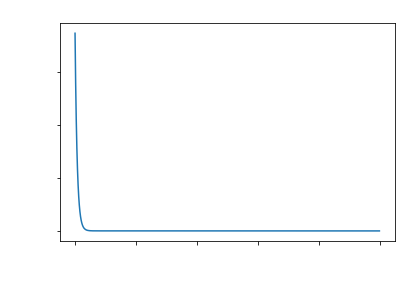

In [41]:
plt.plot(range(iters), l_j)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

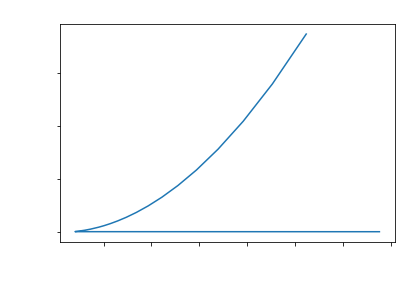

In [42]:
plt.plot(l_thetas[:, 0], l_j)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

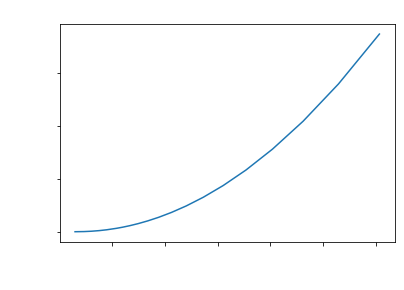

In [43]:
plt.plot(l_thetas[:, 1], l_j)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

#### Plot all regression lines till converge

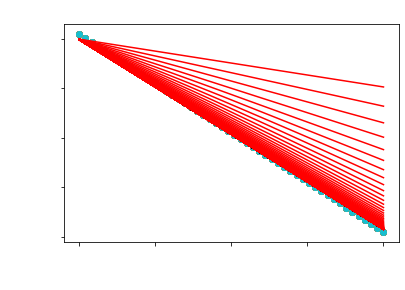

In [44]:
for thetas in l_thetas:
    y_predicted = thetas[0] + (thetas[1]*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

#### Plot the best regression line

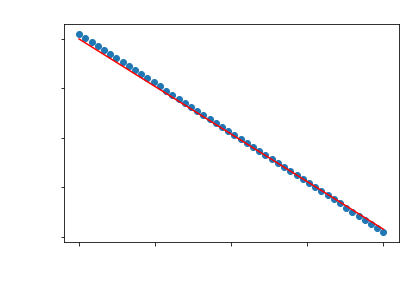

In [45]:
plt.scatter(X, Y)
plt.plot(X, y_predicted, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [46]:
alpha = 1e-2
iters = 500
l_thetas, l_j, l_h, thet = GD(X, Y, alpha, iters)
l_thetas = np.array(l_thetas)
y_predicted = thet[0] + (thet[1]*X)
r2score = r2_score(Y, y_predicted)
print(f'r2score = {r2score}')

x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50
theta_0 = [0.68394582] 
theta_1 = [-1.97649066]
Cost Function = 0.01293095056788881
No. of iterations = 500
r2score = 0.9998145957126938


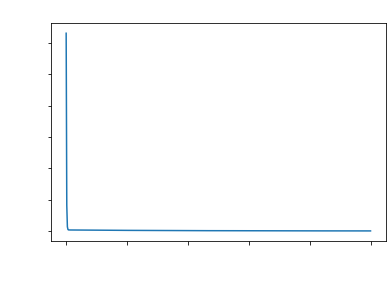

In [47]:
plt.plot(range(iters), l_j)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

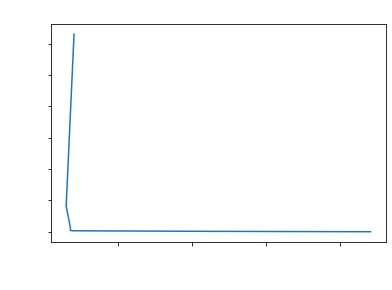

In [48]:
plt.plot(l_thetas[:, 0], l_j)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

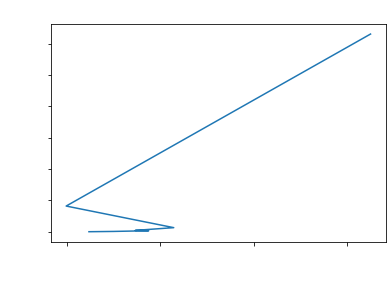

In [49]:
plt.plot(l_thetas[:, 1], l_j)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

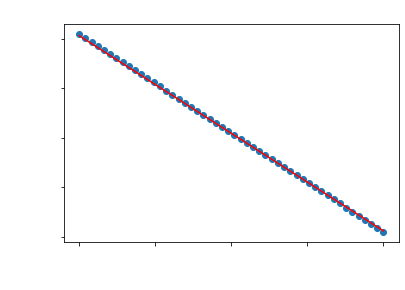

In [50]:
plt.scatter(X, Y)
plt.plot(X, y_predicted, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

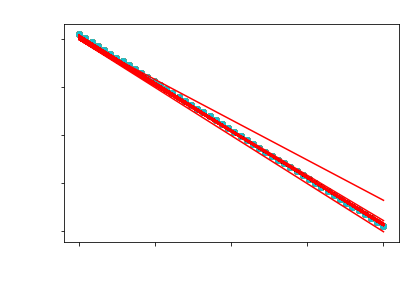

In [51]:
for thetas in l_thetas:
    y_predicted = thetas[0] + (thetas[1]*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [52]:
def GD_mini(X, Y, alpha, iters, batch_size):
    no_thetas = X.shape[-1] + 1
    m = X.shape[0]
    no_batches = int(m/batch_size)
    thetas = np.zeros(no_thetas).reshape(no_thetas, 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis = 1)

    print(f'x = {X.shape}, y = {Y.shape}, thetas = {thetas.shape}, m = {m}')
    batches = []
    outs = []
    i = 0
    for x in range(no_batches):
        batch = X[i:i+b]
        out = Y[i:i+b]
        batches.append(batch)
        outs.append(out)
        i += b    
        
    print(f'No. of batches = {len(batches)}, batch size = {len(batches[0])}')
    #h = np.dot(batches[0], thetas)
    #z = h - Y
    #j = ((1/(2*m))*(z**2)).sum()
    #j_prime = (1/m)*(np.dot(X_batch.T, z))
    #thetas = thetas - alpha*j_prime
    list_of_hs = []
    list_of_js = []
    list_of_thetass = []
    
    for n in range(len(batches)):
        batch = batches[n]
        out = outs[n]
        #print(f'batch = {batch}, Out = {out}')
        
        m2 = batch_size
        
        counter = 0
        list_h = []
        list_j= []
        list_thetas = []

        #print(f'Thetas = \n{thetas}')

        while(counter < iters):
            #Step 2 
            h = np.dot(batch, thetas)    
            list_h.append(h)
            #Step 3
            z = h - out
            j = ((1/(2*m2))*(z**2)).sum()
            list_j.append(j)
            #Step 4
            j_prime = (1/m2)*(np.dot(batch.T, z))
            #Step 5
            thetas = thetas - alpha*j_prime

            list_thetas.append(thetas)

            counter += 1
            
        #thetas = thetas - alpha*j_prime
        
            
        list_of_hs.append(list_h)
        list_of_js.append(list_j)
        list_of_thetass.append(list_thetas)

    print(f"theta_0 = {thetas[0]} \ntheta_1 = {thetas[1]}\nCost Function = {j}\nNo. of iterations = {counter}")
    return list_of_thetass, list_of_js, list_of_hs, thetas    

In [60]:
def Mini_SVGD(X, Y, alpha, iters, batch_size, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    
    m = X.shape[0]
    no_batches = int(m/batch_size)
    batches = []
    outs = []
    i = 0
    for x in range(no_batches):
        batch = x_points[i:i+b]
        out = y_points[i:i+b]
        batches.append(batch)
        outs.append(out)
        i += b    
        
    print(f'No. of batches = {len(batches)}, batch size = {len(batches[0])}')
    
    
    list_of_js = []
    list_of_thetass = []
    
    for n in range(len(batches)):
        batch = batches[n]
        out = outs[n]
        
        #print(f'Batch = \n{batch}, \nOut = \n{out}')
    
        counter = 0
        list_j=[]
        list_thetas=[]
    
        h_theta = theta_0 + (theta_1*batch)
        j = ((1/2)*((h_theta - out)**2)).mean()
        list_j.append(j)
        j_prime_theta_0 = (h_theta - out).mean()
        j_prime_theta_1 = ((h_theta - out)*batch).mean()
        theta_0 = theta_0 - (alpha*(j_prime_theta_0))
        theta_1 = theta_1 - (alpha*(j_prime_theta_1))
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
    
        while(counter < iters):
            #Step 2 
            h_theta = theta_0 + (theta_1*batch)
            #Step 3
            j_old = j
            j = ((1/2)*((h_theta - out)**2)).mean()
            if abs(j - j_old) < 10**-tol:
                break
            list_j.append(j)
            #Step 4
            j_prime_theta_0 = (h_theta - out).mean()
            j_prime_theta_1 = ((h_theta - out)*x_points).mean()
            #Step 5
            theta_0 = theta_0 - (alpha*(j_prime_theta_0))
            theta_1 = theta_1 - (alpha*(j_prime_theta_1))

            thetas = [theta_0, theta_1]
            list_thetas.append(thetas)


            counter += 1

        list_of_js.append(list_j)
        list_of_thetass.append(list_thetas)
        
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nNumber of iterations = {counter} \nBatch Size = {batch_sizeh} \nNumber of Batches = {len(batches)}")
    return list_thetas, list_j, thetas

In [61]:
alpha_mini = 1e-3
iters_mini = 500
b = 5
l_thetas_mini, l_j_mini, l_h_mini, thet_mini = GD_mini(X, Y, alpha_mini, iters_mini, b)
y_mini_predicted = thet_mini[0] + (thet_mini[1]*X)
r2score_mini = r2_score(Y, y_mini_predicted)
print(f'r2score = {r2score_mini}')
l_thetas_mini = np.array(l_thetas_mini)
l_j_mini = np.array(l_j_mini)
l_h_mini = np.array(l_h_mini)

x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50
No. of batches = 10, batch size = 5
theta_0 = [-0.53510126] 
theta_1 = [-1.92005095]
Cost Function = 0.0010658254869722913
No. of iterations = 500
r2score = 0.9945027670948267


In [62]:
alpha_Mini_SVGD = 1e-3
iters_Mini_SVGD = 500
b_Mini_SVGD = 5
tol_Mini_SVGD = 5
l_thetas_Mini_SVGD, l_js_Mini_SVGD, thetas_Mini_SVGD = Mini_SVGD(X, Y, alpha_Mini_SVGD, iters_Mini_SVGD, b_Mini_SVGD, tol_Mini_SVGD)
y_Mini_SVGD_predicted = thetas_Mini_SVGD[0] + (thetas_Mini_SVGD[1]*X)
r2score_Mini_SVGD = r2_score(Y, y_Mini_SVGD_predicted)
print(f'r2score_Mini_SVGD = {r2score_Mini_SVGD}')
l_thetas_Mini_SVGD = np.array(l_thetas_Mini_SVGD)
l_js_Mini_SVGD = np.array(l_js_Mini_SVGD)


No. of batches = 10, batch size = 5
Batch = 
[[0.        ]
 [0.40816327]
 [0.81632653]
 [1.2244898 ]
 [1.63265306]], 
Out = 
[[ 1.        ]
 [ 0.18367347]
 [-0.63265306]
 [-1.44897959]
 [-2.26530612]]


ValueError: operands could not be broadcast together with shapes (5,1) (50,1) 

In [22]:
l_j_mini2 = l_j_mini.flatten()
l_thetas0_mini = l_thetas_mini[:,:,0].flatten()
l_thetas1_mini = l_thetas_mini[:,:,1].flatten()

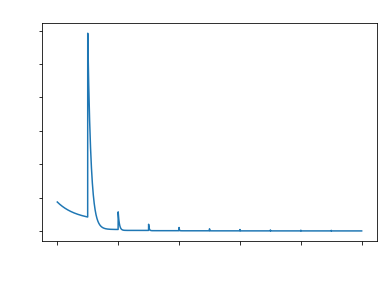

In [23]:
plt.plot(range(iters*(l_j_mini.shape[0])), l_j_mini2)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

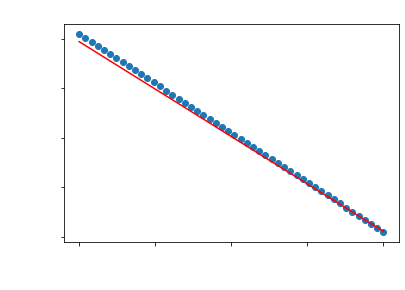

In [24]:
plt.scatter(X, Y)
plt.plot(X, y_mini_predicted, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

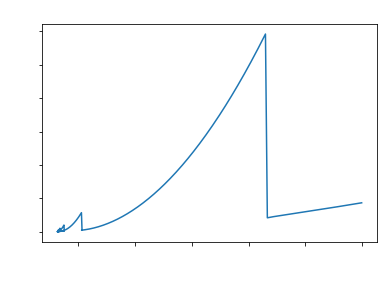

In [25]:
plt.plot(l_thetas0_mini, l_j_mini2)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

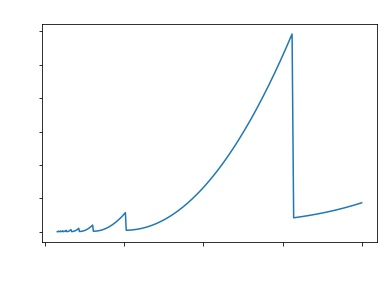

In [26]:
plt.plot(l_thetas1_mini, l_j_mini2)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

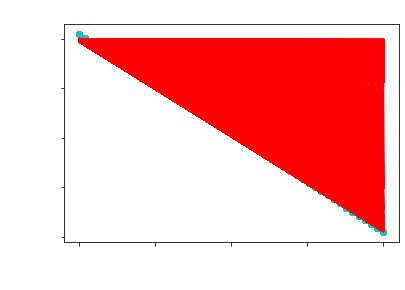

In [27]:
for n in range(len(l_thetas0_mini)):
    theta0 = l_thetas0_mini[n]
    theta1 = l_thetas1_mini[n]
    y_predicted = theta0 + (theta1*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [28]:
def SGD(X, Y, alpha, iters):
    no_thetas = X.shape[-1] + 1
    m = X.shape[0]
    thetas = np.zeros(no_thetas).reshape(no_thetas, 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis = 1)

    print(f'x = {X.shape}, y = {Y.shape}, thetas = {thetas.shape}, m = {m}')
    #batches = []
    #outs = []
    #i = 0
    #for x in range(no_batches):
    #    batch = X[i:i+b]
    #    out = Y[i:i+b]
    #    batches.append(batch)
    #    outs.append(out)
    #    i += b    
        
    #print(f'No. of batches = {len(batches)}, batch size = {len(batches[0])}')
    #h = np.dot(batches[0], thetas)
    #z = h - Y
    #j = ((1/(2*m))*(z**2)).sum()
    #j_prime = (1/m)*(np.dot(X_batch.T, z))
    #thetas = thetas - alpha*j_prime
    list_of_hs = []
    list_of_js = []
    list_of_thetass = []
    
    for n in range(len(X)):
        #batch = batches[n]
        #out = outs[n]
        #print(f'batch = {batch}, Out = {out}')
        batch = X[n]
        out = Y[n]
        batch = batch.reshape(batch.shape[0], 1)
        out = out.reshape(out.shape[0], 1)
        #print(f'batch = {batch.shape}, out = {out.shape}')
        counter = 0

        #print(f'Thetas = \n{thetas}')

        while(counter < iters):
            #Step 2 
            h = np.dot(batch.T, thetas)    
            list_of_hs.append(h)
            #Step 3
            z = h - out
            j = (z**2)
            list_of_js.append(j)
            #Step 4
            j_prime = (np.dot(batch, z))
            #Step 5
            thetas = thetas - alpha*j_prime

            list_of_thetass.append(thetas)

            counter += 1
            
        #thetas = thetas - alpha*j_prime
        
            
    print(f"theta_0 = {thetas[0]} \ntheta_1 = {thetas[1]}\nCost Function = {j}\nNo. of iterations = {counter}")
    return list_of_thetass, list_of_js, list_of_hs, thetas    

In [29]:
alpha_sgd = 1e-3
iters_sgd = 60
l_thetas_sgd, l_j_sgd, l_h_sgd, thet_sgd = SGD(X, Y, alpha_sgd, iters_sgd)
y_sgd_predicted = thet_sgd[0] + (thet_sgd[1]*X)
r2score_sgd = r2_score(Y, y_sgd_predicted)
print(f'r2score = {r2score_sgd}')
l_thetas_sgd = np.array(l_thetas_sgd)
l_j_sgd = np.array(l_j_sgd)
l_h_sgd = np.array(l_h_sgd)


x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50
theta_0 = [-0.67189776] 
theta_1 = [-1.91640511]
Cost Function = [[0.]]
No. of iterations = 60
r2score = 0.9932174272467368


In [30]:
l_j_sgd2 = l_j_sgd.flatten()
l_thetas0_sgd = l_thetas_sgd[:,0].flatten()
l_thetas1_sgd = l_thetas_sgd[:,1].flatten()


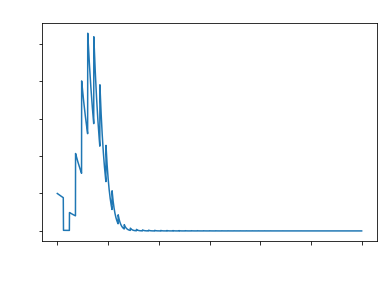

In [31]:
plt.plot(range(l_j_sgd2.size), l_j_sgd2)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

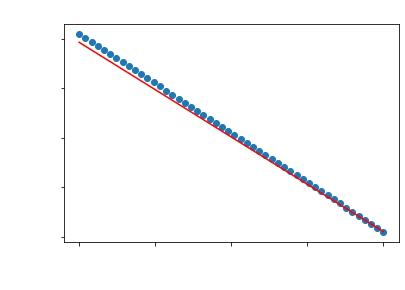

In [32]:
plt.scatter(X, Y)
plt.plot(X, y_sgd_predicted, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

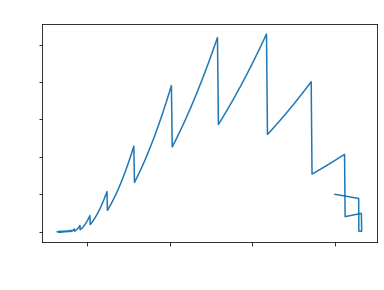

In [33]:
plt.plot(l_thetas0_sgd, l_j_sgd2)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

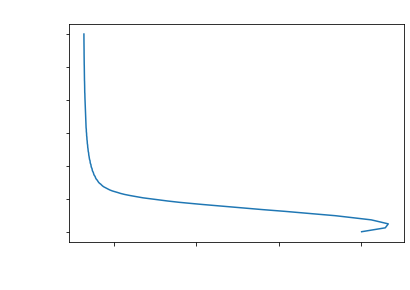

In [34]:
plt.plot(l_thetas0_sgd, range(l_thetas0_sgd.size))
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Iterations', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

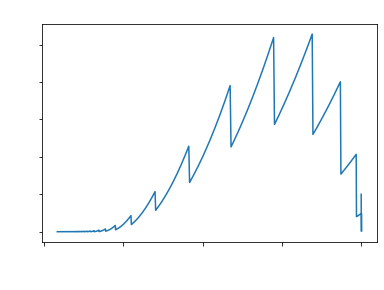

In [35]:
plt.plot(l_thetas1_sgd, l_j_sgd2)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

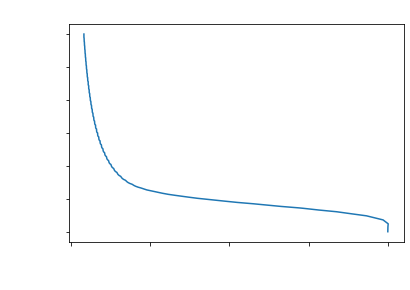

In [36]:
plt.plot(l_thetas1_sgd, range(l_thetas1_sgd.size))
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Iterations', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

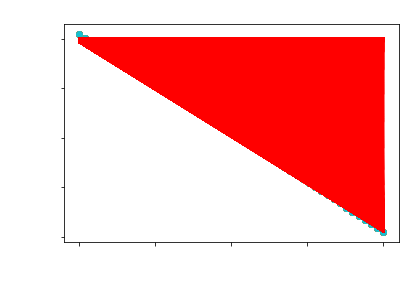

In [37]:
for n in range(len(l_thetas0_sgd)):
    theta0 = l_thetas0_sgd[n]
    theta1 = l_thetas1_sgd[n]
    y_predicted = theta0 + (theta1*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);